In [4]:
#import required modules in the project
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

Populating the interactive namespace from numpy and matplotlib


In [5]:
# read the data from the csv file stored locally
df=pd.read_csv("C:/Users/adm/Documents/Python Scripts/Dataset/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#create the new dataframe abd assign the varibale to it
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']

In [10]:
y=df['Survived']

In [11]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [12]:
X[:5]

,sex,age,pclass,sibsp,parch
0,male,22.0,3,1,0
1,female,38.0,1,1,0
2,female,26.0,3,0,0
3,female,35.0,1,1,0
4,male,35.0,3,0,0


### Treating Missing Values in Age

sex         0
age       177
pclass      0
sibsp       0
parch       0
dtype: int64

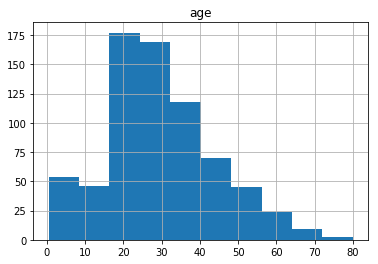

In [14]:
X.hist('age')
X.isnull().sum()

In [23]:
X['age'] = X['age'].fillna(X.age.median())
print (X.age.isnull().sum())

0


### One hot encoding for varibales sex 

In [24]:
print (X.sex[:5])
X['sex'] = pd.get_dummies(X.sex)['female']
print (X.sex[:5])

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object
0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: uint8


### Creating dumies for varibales Pclass

In [25]:
# #Pclass
print (X[:5])
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))
print (X[:5])
X = X.drop(['pclass_1', 'pclass'], axis=1)
print (X[:5])

   sex   age  pclass  sibsp  parch
0    0  22.0       3      1      0
1    1  38.0       1      1      0
2    1  26.0       3      0      0
3    1  35.0       1      1      0
4    0  35.0       3      0      0
   sex   age  pclass  sibsp  parch  pclass_1  pclass_2  pclass_3
0    0  22.0       3      1      0         0         0         1
1    1  38.0       1      1      0         1         0         0
2    1  26.0       3      0      0         0         0         1
3    1  35.0       1      1      0         1         0         0
4    0  35.0       3      0      0         0         0         1
   sex   age  sibsp  parch  pclass_2  pclass_3
0    0  22.0      1      0         0         1
1    1  38.0      1      0         0         0
2    1  26.0      0      0         0         1
3    1  35.0      1      0         0         0
4    0  35.0      0      0         0         1


### Standardizing Age variable

In [26]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X[['age']])
print (X[:5])
print (X1[:5])
X['age'] = X1 
print (X[:5])

   sex   age  sibsp  parch  pclass_2  pclass_3
0    0  22.0      1      0         0         1
1    1  38.0      1      0         0         0
2    1  26.0      0      0         0         1
3    1  35.0      1      0         0         0
4    0  35.0      0      0         0         1
[[-0.56573646]
 [ 0.66386103]
 [-0.25833709]
 [ 0.4333115 ]
 [ 0.4333115 ]]
   sex       age  sibsp  parch  pclass_2  pclass_3
0    0 -0.565736      1      0         0         1
1    1  0.663861      1      0         0         0
2    1 -0.258337      0      0         0         1
3    1  0.433312      1      0         0         0
4    0  0.433312      0      0         0         1


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [28]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [29]:
print (X_train.head())
print (X_test.head())
print (y_train.head())
print (y_test.head())

     sex       age  sibsp  parch  pclass_2  pclass_3
331    0  1.240235      0      0         0         0
733    0 -0.488887      0      0         1         0
382    0  0.202762      0      0         0         1
704    0 -0.258337      1      0         0         1
813    1 -1.795334      4      2         0         1
     sex       age  sibsp  parch  pclass_2  pclass_3
709    0 -0.104637      1      1         0         1
439    0  0.125912      0      0         1         0
840    0 -0.719436      0      0         0         1
720    1 -1.795334      0      1         1         0
39     1 -1.180535      1      0         0         1
331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64
709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64


In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [31]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic accuracy is 0.80


<h2>Calculate Logistic Model Accuracy using AUC score</h2>

In [33]:
#lets measure the logistic model AUC
logistic_roc_auc=roc_auc_score(y_test,model.predict(X_test))

In [34]:
print ("Logistic AUC = %2.2f " % logistic_roc_auc )
print (classification_report(y_test,model.predict(X_test)))

Logistic AUC = 0.78 
             precision    recall  f1-score   support

          0       0.80      0.88      0.84       105
          1       0.80      0.69      0.74        74

avg / total       0.80      0.80      0.80       179



- **precision** - is proportion of the correct predicted class from the predicted class    - **Higher the better**
- **recall**    - is proportion of the correct predicted class from actual class           - **Higher the better**
- **f1-score**  - is a measure of a test's accuracy                                        - **Higher the better**
- **support**   - is the number of samples of the true response that lie in that class

<h2>ROC Curve</h2>

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

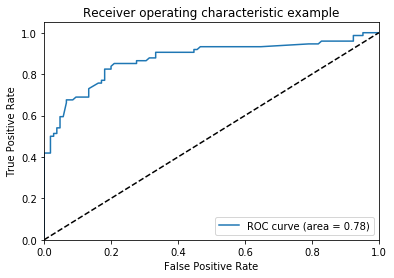

In [36]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<h1 style="color:green">The overall Logistic AUC for this model is 0.81</h1>